<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_3_2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.228717,80.351328,65.151347,29.405620,0.000195,280.137208,280.138112,-0.000904
1,0.0,1.0,26.191868,96.607735,45.785167,28.285711,-0.001079,206.869402,206.869992,-0.000590
2,0.0,2.0,86.582821,49.754391,44.073888,26.323812,-0.002167,216.732745,216.736428,-0.003682
3,0.0,3.0,60.804816,99.683543,75.077207,75.449322,-0.000840,321.014048,321.013711,0.000337
4,0.0,4.0,25.050986,55.519404,45.840153,25.144787,-0.000035,161.555293,161.556375,-0.001082
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,86.664927,66.862294,30.832902,50.465389,-0.000751,244.824761,244.825288,-0.000527
19996,999.0,16.0,99.137398,23.554886,58.289735,47.681991,-0.003505,238.660504,238.662131,-0.001627
19997,999.0,17.0,55.351671,76.595315,45.328834,39.039632,0.000329,226.315781,226.315292,0.000489
19998,999.0,18.0,26.889070,86.446633,74.774560,77.760289,-0.000328,275.870224,275.869995,0.000229


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.228717  80.351328  65.151347  29.405620  0.000195  280.137208   
      1.0    26.191868  96.607735  45.785167  28.285711 -0.001079  206.869402   
      2.0    86.582821  49.754391  44.073888  26.323812 -0.002167  216.732745   
      3.0    60.804816  99.683543  75.077207  75.449322 -0.000840  321.014048   
      4.0    25.050986  55.519404  45.840153  25.144787 -0.000035  161.555293   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   86.664927  66.862294  30.832902  50.465389 -0.000751  244.824761   
      16.0   99.137398  23.554886  58.289735  47.681991 -0.003505  238.660504   
      17.0   55.351671  76.595315  45.328834  39.039632  0.000329  226.315781   
      18.0   26.889070  86.446633  74.774560  77.760289 -0.000328  275.870224   
      19.0   80.226399  24.785054  98.636948  58.533563  0.001970  272.183933   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    280.138112 -0.000904  
      1.0    206.869992 -0.000590  
      2.0    216.736428 -0.003682  
      3.0    321.013711  0.000337  
      4.0    161.556375 -0.001082  
...                 ...       ...  
999.0 15.0   244.825288 -0.000527  
      16.0   238.662131 -0.001627  
      17.0   226.315292  0.000489  
      18.0   275.869995  0.000229  
      19.0   272.179488  0.004445  

[20000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.228717  80.351328  65.151347  29.405620  0.000195  280.137208   
      1.0    26.191868  96.607735  45.785167  28.285711 -0.001079  206.869402   
      2.0    86.582821  49.754391  44.073888  26.323812 -0.002167  216.732745   
      3.0    60.804816  99.683543  75.077207  75.449322 -0.000840  321.014048   
      4.0    25.050986  55.519404  45.840153  25.144787 -0.000035  161.555293   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   86.664927  66.862294  30.832902  50.465389 -0.000751  244.824761   
      16.0   99.137398  23.554886  58.289735  47.681991 -0.003505  238.660504   
      17.0   55.351671  76.595315  45.328834  39.039632  0.000329  226.315781   
      18.0   26.889070  86.446633  74.774560  77.760289 -0.000328  275.870224   
      19.0   80.226399  24.785054  98.636948  58.533563  0.001970  272.183933   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    280.138112 -0.000904  
      1.0    206.869992 -0.000590  
      2.0    216.736428 -0.003682  
      3.0    321.013711  0.000337  
      4.0    161.556375 -0.001082  
...                 ...       ...  
999.0 15.0   244.825288 -0.000527  
      16.0   238.662131 -0.001627  
      17.0   226.315292  0.000489  
      18.0   275.869995  0.000229  
      19.0   272.179488  0.004445  

[20000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.228717,80.351328,65.151347,29.405620,0.000195,280.137208,280.138112,-0.000904
1,0.0,1.0,26.191868,96.607735,45.785167,28.285711,-0.001079,206.869402,206.869992,-0.000590
2,0.0,2.0,86.582821,49.754391,44.073888,26.323812,-0.002167,216.732745,216.736428,-0.003682
3,0.0,3.0,60.804816,99.683543,75.077207,75.449322,-0.000840,321.014048,321.013711,0.000337
4,0.0,4.0,25.050986,55.519404,45.840153,25.144787,-0.000035,161.555293,161.556375,-0.001082
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,86.664927,66.862294,30.832902,50.465389,-0.000751,244.824761,244.825288,-0.000527
19996,999.0,16.0,99.137398,23.554886,58.289735,47.681991,-0.003505,238.660504,238.662131,-0.001627
19997,999.0,17.0,55.351671,76.595315,45.328834,39.039632,0.000329,226.315781,226.315292,0.000489
19998,999.0,18.0,26.889070,86.446633,74.774560,77.760289,-0.000328,275.870224,275.869995,0.000229


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.228717  80.351328  65.151347  29.405620  0.000195  280.137208   
      1.0    26.191868  96.607735  45.785167  28.285711 -0.001079  206.869402   
      2.0    86.582821  49.754391  44.073888  26.323812 -0.002167  216.732745   
      3.0    60.804816  99.683543  75.077207  75.449322 -0.000840  321.014048   
      4.0    25.050986  55.519404  45.840153  25.144787 -0.000035  161.555293   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   86.664927  66.862294  30.832902  50.465389 -0.000751  244.824761   
      16.0   99.137398  23.554886  58.289735  47.681991 -0.003505  238.660504   
      17.0   55.351671  76.595315  45.328834  39.039632  0.000329  226.315781   
      18.0   26.889070  86.446633  74.774560  77.760289 -0.000328  275.870224   
      19.0   80.226399  24.785054  98.636948  58.533563  0.001970  272.183933   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    280.138112 -0.000904  
      1.0    206.869992 -0.000590  
      2.0    216.736428 -0.003682  
      3.0    321.013711  0.000337  
      4.0    161.556375 -0.001082  
...                 ...       ...  
999.0 15.0   244.825288 -0.000527  
      16.0   238.662131 -0.001627  
      17.0   226.315292  0.000489  
      18.0   275.869995  0.000229  
      19.0   272.179488  0.004445  

[20000 rows x 8 columns]

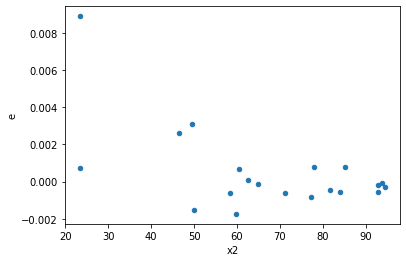

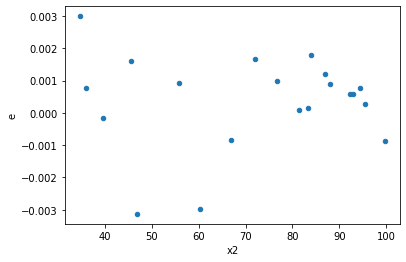

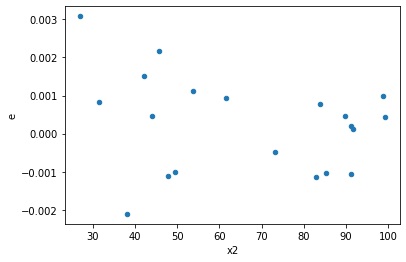

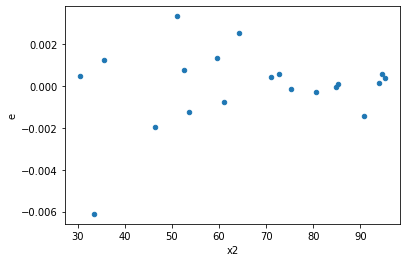

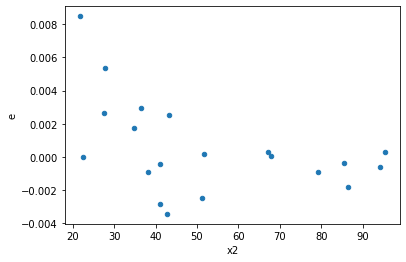

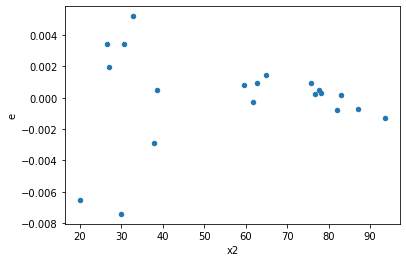

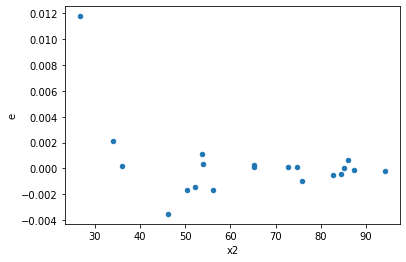

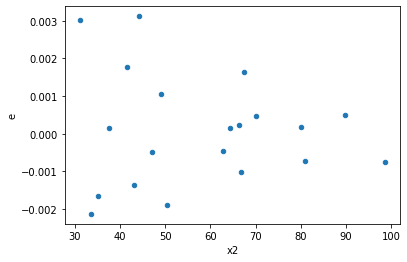

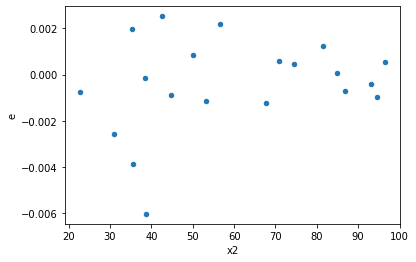

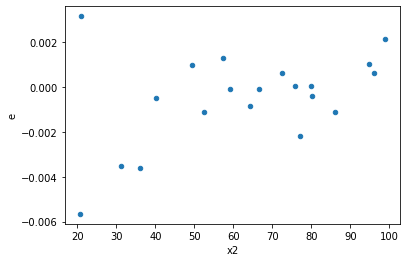

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,4.0,8.0,3.170674064700133e-06,5.234216690517741e-05,7.926685161750332e-07,6.542770863147176e-06,8.254107145214828,0.01221386161666782,0.9938930691916661,0.00610693080833391,Reject005=0 : Heteroscedasticity
1.0,4.0,8.0,6.054715153593919e-06,4.11712994611696e-05,1.5136787883984798e-06,5.1464124326462e-06,3.3999369430890076,0.1324198008283437,0.9337900995858281,0.06620990041417185,Reject005=1 : Homoscedasticity
2.0,6.0,6.0,9.517068909974393e-06,2.629385026574594e-05,1.5861781516623988e-06,4.382308377624323e-06,2.7628096963959763,0.2416588105068731,0.8791705947465634,0.12082940525343655,Reject005=1 : Homoscedasticity
5.0,3.0,9.0,5.172420107128246e-06,9.432617141548152e-05,1.7241400357094153e-06,1.048068571283128e-05,6.078790292993164,0.03027171459904432,0.9848641427004778,0.01513585729952216,Reject005=0 : Heteroscedasticity
8.0,5.0,7.0,2.4249023896204944e-06,0.0001014271501439878,4.849804779240989e-07,1.4489592877712542e-05,29.87665181850931,0.0002792769070214529,0.9998603615464893,0.00013963845351072646,Reject005=0 : Heteroscedasticity
9.0,2.0,10.0,4.137853578901328e-06,5.1685163258607266e-05,2.068926789450664e-06,5.1685163258607265e-06,2.4981629858604406,0.26369727117867137,0.8681513644106643,0.13184863558933568,Reject005=1 : Homoscedasticity
10.0,9.0,3.0,4.149053114152067e-06,1.0511134219876685e-05,4.6100590157245184e-07,3.5037114066255615e-06,7.600144368379452,0.1223165621874498,0.9388417189062751,0.0611582810937249,Reject005=1 : Homoscedasticity
14.0,6.0,6.0,3.619157711610027e-05,4.233692360188175e-05,6.031929519350045e-06,7.056153933646959e-06,1.1698004611975765,0.8538674744020827,0.5730662627989587,0.42693373720104133,Reject005=1 : Homoscedasticity
16.0,4.0,8.0,2.207940639326877e-06,8.680956429627301e-05,5.519851598317193e-07,1.0851195537034127e-05,19.65849143542604,0.0006734063874014318,0.9996632968062993,0.0003367031937007159,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,8.0,3.170674064700133e-06,5.234216690517741e-05,7.926685161750332e-07,6.542770863147176e-06,8.254107145214828,0.01221386161666782,Reject005=0 : Heteroscedasticity
1.0,4.0,8.0,6.054715153593919e-06,4.11712994611696e-05,1.5136787883984798e-06,5.1464124326462e-06,3.3999369430890076,0.1324198008283437,Reject005=1 : Homoscedasticity
2.0,6.0,6.0,9.517068909974393e-06,2.629385026574594e-05,1.5861781516623988e-06,4.382308377624323e-06,2.7628096963959763,0.2416588105068731,Reject005=1 : Homoscedasticity
3.0,6.0,6.0,3.4250107479523476e-05,1.0675930881750811e-05,5.708351246587246e-06,1.7793218136251352e-06,0.31170503298809926,0.18181023338693814,Reject005=1 : Homoscedasticity
4.0,7.0,5.0,3.3254547215346146e-05,7.009018927202722e-06,4.750649602192307e-06,1.4018037854405443e-06,0.2950762322680348,0.14263111953404806,Reject005=1 : Homoscedasticity
5.0,3.0,9.0,5.172420107128246e-06,9.432617141548152e-05,1.7241400357094153e-06,1.048068571283128e-05,6.078790292993164,0.03027171459904432,Reject005=0 : Heteroscedasticity
6.0,7.0,5.0,0.00016010606562453914,7.6238042118126035e-06,2.287229508921988e-05,1.5247608423625206e-06,0.06666409454821906,0.002544839551139177,Reject005=0 : Heteroscedasticity
7.0,8.0,4.0,0.00010113584548852759,3.3689114916040445e-06,1.2641980686065949e-05,8.422278729010111e-07,0.0666215123892191,0.0017313484435263777,Reject005=0 : Heteroscedasticity
8.0,5.0,7.0,2.4249023896204944e-06,0.0001014271501439878,4.849804779240989e-07,1.4489592877712542e-05,29.87665181850931,0.0002792769070214529,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      529
Reject005=0 : Heteroscedasticity    471
Name: Result_test, dtype: int64